<a href="https://colab.research.google.com/github/datadigger01/AI-Trade/blob/main/tr_ramen_trend_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 한글폰트 설치
- 설치후 '세션 다시 시작' (런타임>세션다시시작)

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,593 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126675 files and dire

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

# 한글 폰트 설정 (나눔 글꼴)
plt.rcParams['font.family'] = 'NanumGothic' # 설치된 나눔고딕 폰트 이름으로 변경
plt.rcParams['axes.unicode_minus'] = False

## 1. Data Load

In [3]:
url = 'https://raw.githubusercontent.com/datadigger01/AI-Trade/main/Data/kor_ramen_expratio_15_24.csv'
df = pd.read_csv(url)
print(df.info())

display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   statCd          67 non-null     object 
 1   statCdCntnKor1  67 non-null     object 
 2   2015            66 non-null     float64
 3   2016            67 non-null     float64
 4   2017            67 non-null     float64
 5   2018            67 non-null     float64
 6   2019            67 non-null     float64
 7   2020            66 non-null     float64
 8   2021            66 non-null     float64
 9   2022            67 non-null     float64
 10  2023            67 non-null     float64
 11  2024            67 non-null     float64
dtypes: float64(10), object(2)
memory usage: 6.4+ KB
None


,statCd,statCdCntnKor1,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,AE,아랍에미리트 연합,0.297063,0.514908,0.885231,0.842657,1.0,1.292011,3.070706,4.669419,3.848955,5.264214
1,AR,아르헨티나,0.803359,0.859201,1.133428,0.714777,1.0,0.440939,0.977887,1.280813,1.314926,1.635435
2,AS,아메리칸 사모아,0.915454,0.893898,0.723542,0.936451,1.0,1.050419,1.078093,1.331739,1.350449,1.400715
3,AT,오스트리아,0.023609,0.499012,0.546826,0.640050,1.0,1.974748,2.235833,2.855892,3.567627,2.850775
4,AU,호주,0.498742,0.619457,0.765629,0.914837,1.0,1.116150,1.019058,1.266894,1.616778,1.964405


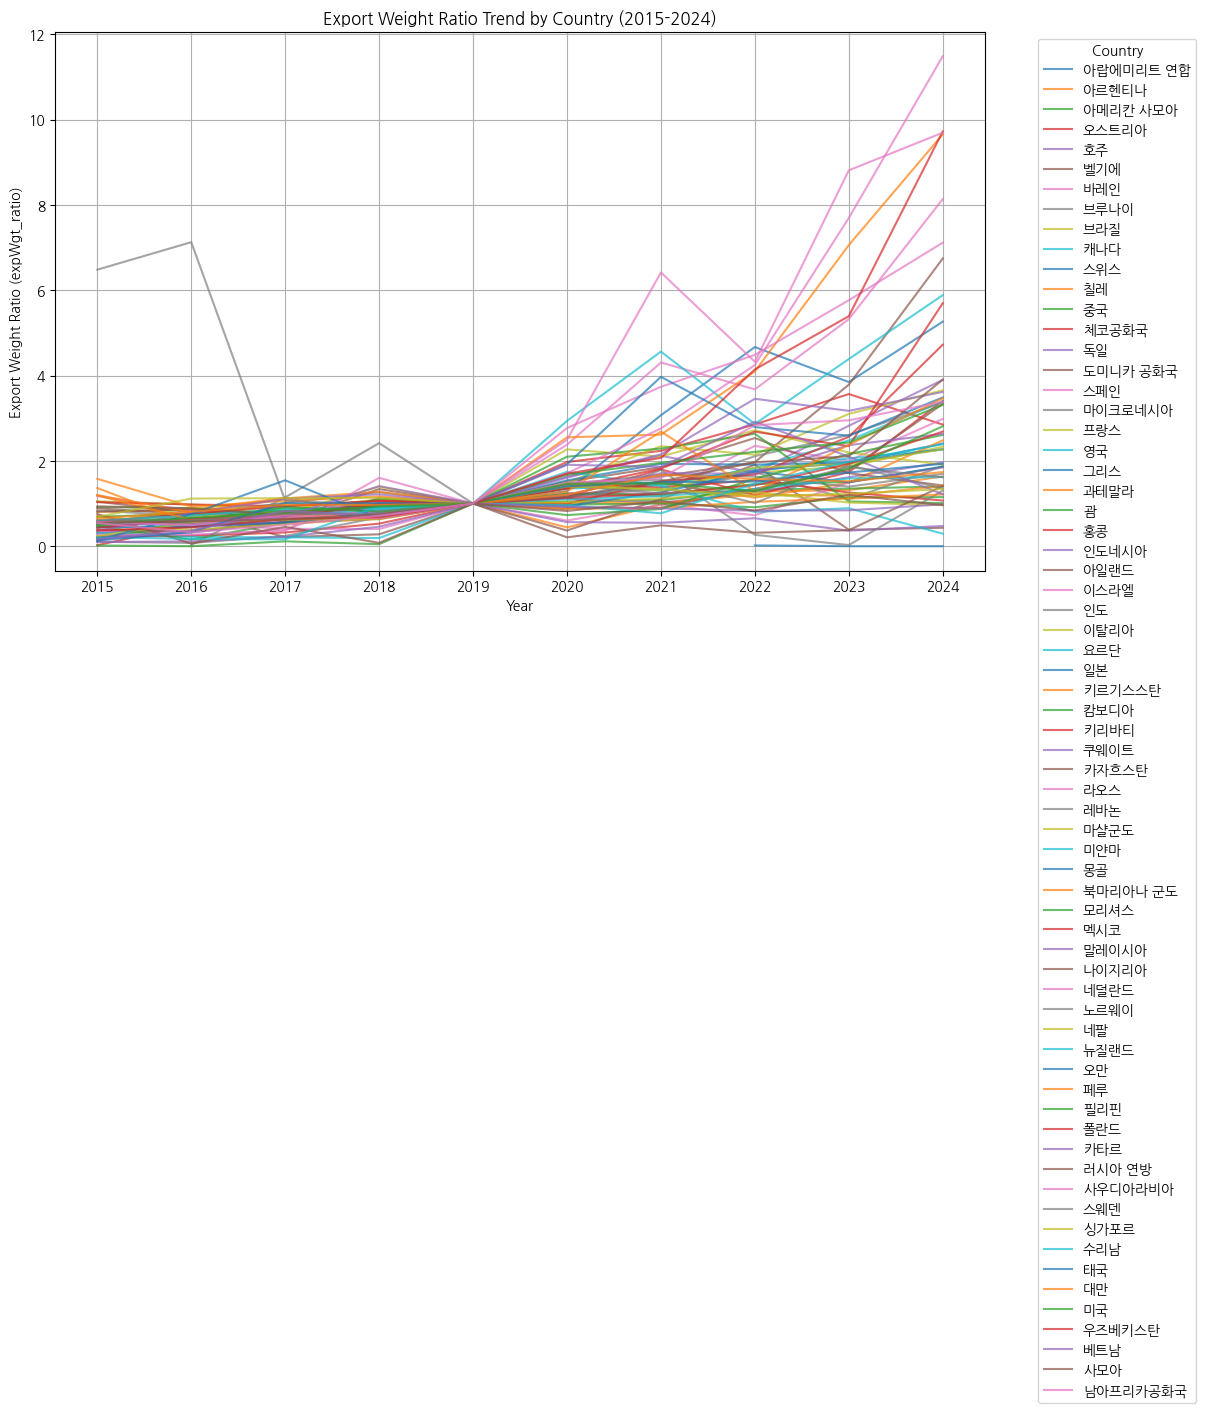

In [4]:
import matplotlib.pyplot as plt


# Define the columns representing the years
year_columns = [str(year) for year in range(2015, 2025)] # Convert years to strings to match column names in df

plt.figure(figsize=(12, 7))

# Plot a line for each country
for index, row in df.iterrows():
    plt.plot(year_columns, row[year_columns], label=row['statCdCntnKor1'], alpha=0.7)

plt.xlabel('Year')
plt.ylabel('Export Weight Ratio (expWgt_ratio)')
plt.title('Export Weight Ratio Trend by Country (2015-2024)')
plt.grid(True)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.tight_layout()
plt.show()

## 2. Clustering를 위한 전처리(pre-processing)
- 년도 기준으로 수출물량의 증감 추이(trend)를 기반으로 한 군집화를 진행하고자 함.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import cdist
import warnings
warnings.filterwarnings('ignore')


# Set style for better visualizations
#plt.style.use('seaborn-v0_8-darkgrid')
#sns.set_palette("husl")

In [6]:
# Prepare data for clustering
# Extract only the year columns (2015-2024) from df
year_columns = [str(year) for year in range(2015, 2025)] # Use strings as column names are strings

X = df[year_columns].values
country_names = df['statCdCntnKor1'].values # Use df for country names
#print(country_names)

# Handle missing values if any (fill with mean) : 결측값 처리
X = np.nan_to_num(X, nan=np.nanmean(X)) # Use np.nanmean to calculate mean while ignoring NaNs


# Standardize the features : 정규화/표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

-  군집의 수를 결정하기 위한 정보

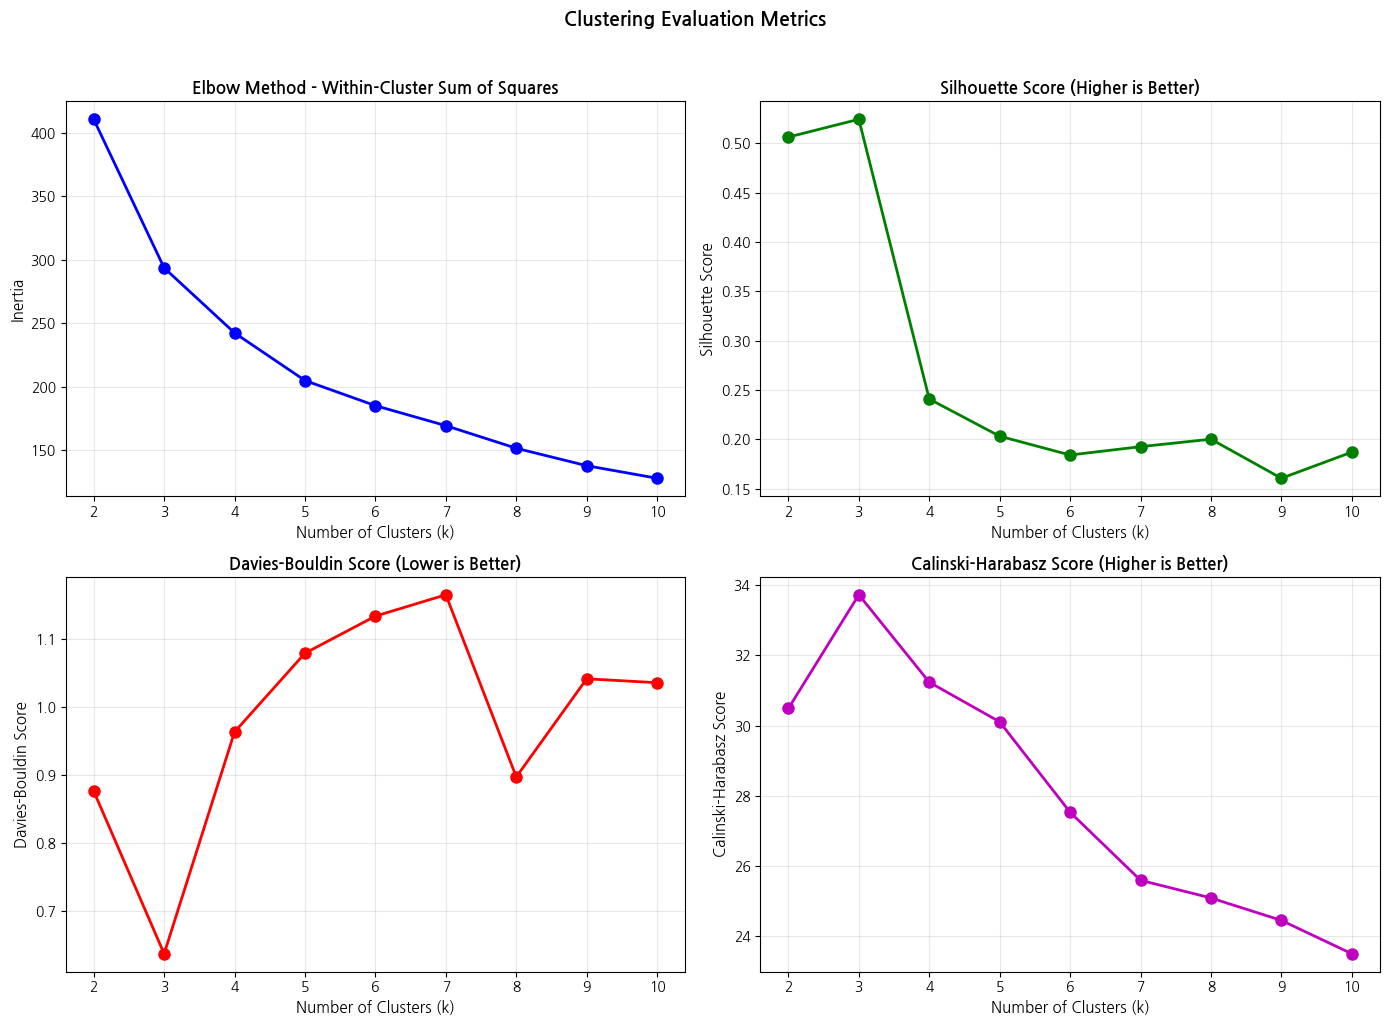


Clustering Evaluation Scores:
------------------------------------------------------------
k     Silhouette   Davies-Bouldin  Calinski-Harabasz 
------------------------------------------------------------
2     0.5063       0.8762          30.49             
3     0.5243       0.6369          33.73             
4     0.2408       0.9632          31.24             
5     0.2031       1.0790          30.11             
6     0.1841       1.1336          27.53             
7     0.1925       1.1650          25.59             
8     0.2001       0.8970          25.08             
9     0.1605       1.0414          24.44             
10    0.1870       1.0356          23.49             

Optimal number of clusters based on Silhouette Score: 3


In [9]:
# Elbow Method
inertias = []
silhouette_scores = []
db_scores = []
ch_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))
    db_scores.append(davies_bouldin_score(X_scaled, kmeans.labels_))
    ch_scores.append(calinski_harabasz_score(X_scaled, kmeans.labels_))

# Plot clustering metrics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Elbow plot
axes[0, 0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0, 0].set_xlabel('Number of Clusters (k)', fontsize=11)
axes[0, 0].set_ylabel('Inertia', fontsize=11)
axes[0, 0].set_title('Elbow Method - Within-Cluster Sum of Squares', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Silhouette score
axes[0, 1].plot(K_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
axes[0, 1].set_xlabel('Number of Clusters (k)', fontsize=11)
axes[0, 1].set_ylabel('Silhouette Score', fontsize=11)
axes[0, 1].set_title('Silhouette Score (Higher is Better)', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Davies-Bouldin score
axes[1, 0].plot(K_range, db_scores, 'ro-', linewidth=2, markersize=8)
axes[1, 0].set_xlabel('Number of Clusters (k)', fontsize=11)
axes[1, 0].set_ylabel('Davies-Bouldin Score', fontsize=11)
axes[1, 0].set_title('Davies-Bouldin Score (Lower is Better)', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Calinski-Harabasz score
axes[1, 1].plot(K_range, ch_scores, 'mo-', linewidth=2, markersize=8)
axes[1, 1].set_xlabel('Number of Clusters (k)', fontsize=11)
axes[1, 1].set_ylabel('Calinski-Harabasz Score', fontsize=11)
axes[1, 1].set_title('Calinski-Harabasz Score (Higher is Better)', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.suptitle('Clustering Evaluation Metrics', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Print scores
print("\nClustering Evaluation Scores:")
print("-"*60)
print(f"{'k':<5} {'Silhouette':<12} {'Davies-Bouldin':<15} {'Calinski-Harabasz':<18}")
print("-"*60)
for i, k in enumerate(K_range):
    print(f"{k:<5} {silhouette_scores[i]:<12.4f} {db_scores[i]:<15.4f} {ch_scores[i]:<18.2f}")

# Determine optimal k (using silhouette score)
optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"\nOptimal number of clusters based on Silhouette Score: {optimal_k}")

## 3. 군집화(Clustering) 수행  : K-means 알고리즘

In [10]:
# Perform K-means with optimal k
#kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)

clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataframe
df['cluster'] = clusters

- K-means 결과 시각화(Visualization)


CLUSTER CHARACTERISTICS

CLUSTER 0 (45 countries)
Countries: 아르헨티나, 아메리칸 사모아, 오스트리아, 호주, 바레인, 브루나이, 브라질, 캐나다, 칠레, 중국
          ... and 35 more

Statistics (in tons):
  Average 2024 export: 2
  Total 2024 export: 105
  Average growth (2015-2024): 270.7%

CLUSTER 1 (1 countries)
Countries: 노르웨이

Statistics (in tons):
  Average 2024 export: 1
  Total 2024 export: 1
  Average growth (2015-2024): -79.2%

CLUSTER 2 (8 countries)
Countries: 아랍에미리트 연합, 이스라엘, 요르단, 키르기스스탄, 라오스, 네덜란드, 우즈베키스탄, 남아프리카공화국

Statistics (in tons):
  Average 2024 export: 8
  Total 2024 export: 67
  Average growth (2015-2024): 1625.1%

CLUSTER 3 (13 countries)
Countries: 벨기에, 스위스, 체코공화국, 인도네시아, 인도, 쿠웨이트, 카자흐스탄, 마샬군도, 몽골, 모리셔스
          ... and 3 more

Statistics (in tons):
  Average 2024 export: 2
  Total 2024 export: 27
  Average growth (2015-2024): 488.0%
Y-axis range fixed to: [-0.0, 0.0] (1000 tons)


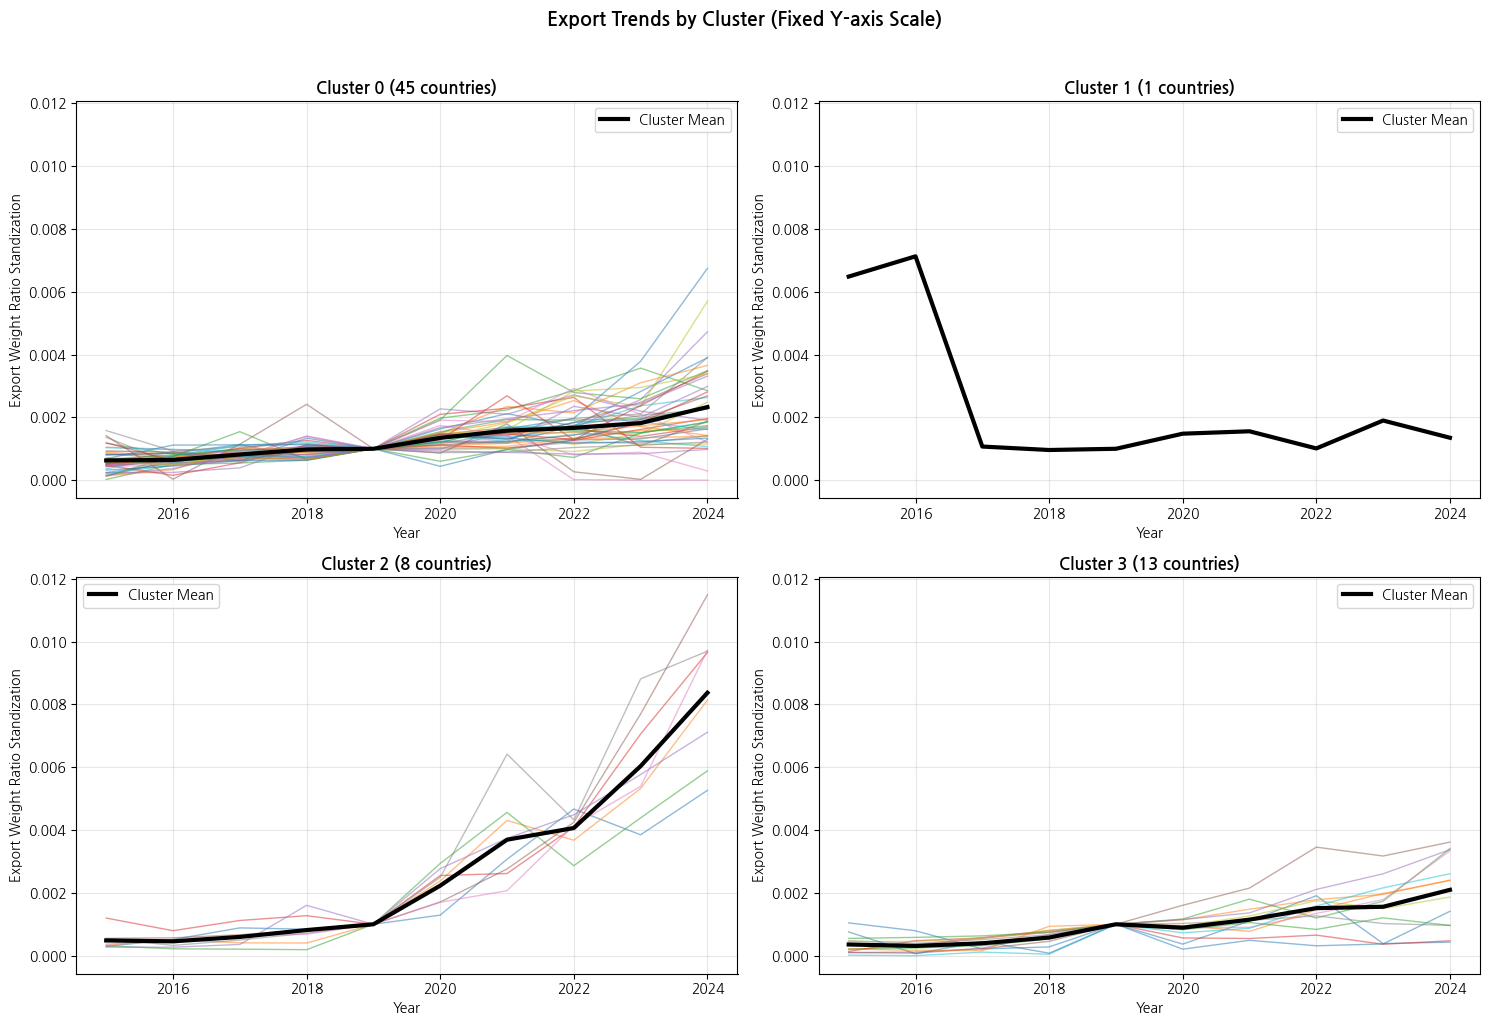

In [11]:
# ============================================================
# 4. CLUSTER ANALYSIS
# ============================================================

print("\n" + "="*80)
print("CLUSTER CHARACTERISTICS")
print("="*80)

#for cluster_id in range(optimal_k):
for cluster_id in range(4):

    cluster_mask = df['cluster'] == cluster_id
    cluster_countries = df[cluster_mask]['statCdCntnKor1'].values
    cluster_data = X[cluster_mask]

    print(f"\n{'='*60}")
    print(f"CLUSTER {cluster_id} ({len(cluster_countries)} countries)")
    print(f"{'='*60}")
    print(f"Countries: {', '.join(cluster_countries[:10])}")
    if len(cluster_countries) > 10:
        print(f"          ... and {len(cluster_countries)-10} more")

    print(f"\nStatistics (in tons):")
    print(f"  Average 2024 export: {cluster_data[:, -1].mean():,.0f}")
    print(f"  Total 2024 export: {cluster_data[:, -1].sum():,.0f}")
    print(f"  Average growth (2015-2024): {((cluster_data[:, -1].mean() / (cluster_data[:, 0].mean() + 1e-10)) - 1) * 100:.1f}%")

# ============================================================
# 6. TIME SERIES VISUALIZATION BY CLUSTER
# ============================================================

# Plot time series for each cluster
fig, axes = plt.subplots(2, (optimal_k + 1) // 2, figsize=(15, 10))
#fig, axes = plt.subplots(2, (4 + 1) // 2, figsize=(15, 10))
axes = axes.flatten()

years = list(range(2015, 2025))

# Calculate global min and max for Y-axis to ensure all plots have same scale
all_data_in_thousands = X / 1000
global_min = all_data_in_thousands.min()
global_max = all_data_in_thousands.max()

# Add some padding (5% on each side) for better visualization
y_padding = (global_max - global_min) * 0.05
y_min = global_min - y_padding
y_max = global_max + y_padding

print(f"Y-axis range fixed to: [{y_min:.1f}, {y_max:.1f}] (1000 tons)")

#for cluster_id in range(optimal_k):
for cluster_id in range(4):
    ax = axes[cluster_id]
    cluster_mask = df['cluster'] == cluster_id
    cluster_data = X[cluster_mask]

    # Plot each country in the cluster
    for i, country_data in enumerate(cluster_data):
        ax.plot(years, country_data / 1000, alpha=0.5, linewidth=1)

    # Plot cluster mean
    cluster_mean = cluster_data.mean(axis=0) / 1000
    ax.plot(years, cluster_mean, 'k-', linewidth=3, label='Cluster Mean')

    ax.set_title(f'Cluster {cluster_id} ({sum(cluster_mask)} countries)', fontweight='bold')
    ax.set_xlabel('Year')
    ax.set_ylabel('Export Weight Ratio Standization')
    ax.grid(True, alpha=0.3)
    ax.legend()

    # Set the same Y-axis limits for all subplots
    ax.set_ylim(y_min, y_max)

# Remove extra subplots if odd number of clusters
#for i in range(optimal_k, len(axes)):
for i in range(4, len(axes)):

    fig.delaxes(axes[i])

plt.suptitle('Export Trends by Cluster (Fixed Y-axis Scale)', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

- K-means 결과를 2차원(2D)으로 시각화


PCA explained variance ratio: [0.4500156  0.24225462]
Total variance explained: 69.23%


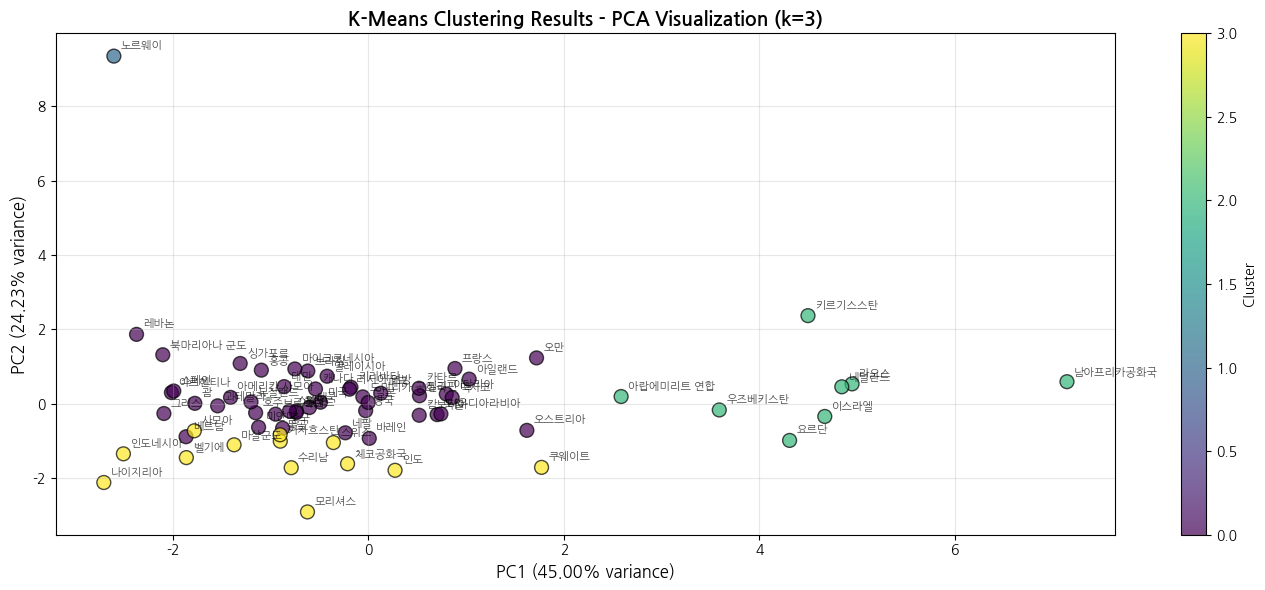

In [12]:
# ============================================================
# 3. PCA VISUALIZATION
# ============================================================

# Perform PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"\nPCA explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {sum(pca.explained_variance_ratio_):.2%}")

# Plot PCA visualization
plt.figure(figsize=(14, 6))

# Create scatter plot
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis',
                     s=100, alpha=0.7, edgecolors='black', linewidth=1)

# Add country labels
for i, country in enumerate(country_names):
    plt.annotate(country, (X_pca[i, 0], X_pca[i, 1]),
                fontsize=8, alpha=0.7,
                xytext=(5, 5), textcoords='offset points')

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)', fontsize=12)
plt.title(f'K-Means Clustering Results - PCA Visualization (k={optimal_k})', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 3. 군집화 수행:  Hierarchical Clustering (계층적 군집화)



- 군집화 실행 및 덴드로그림

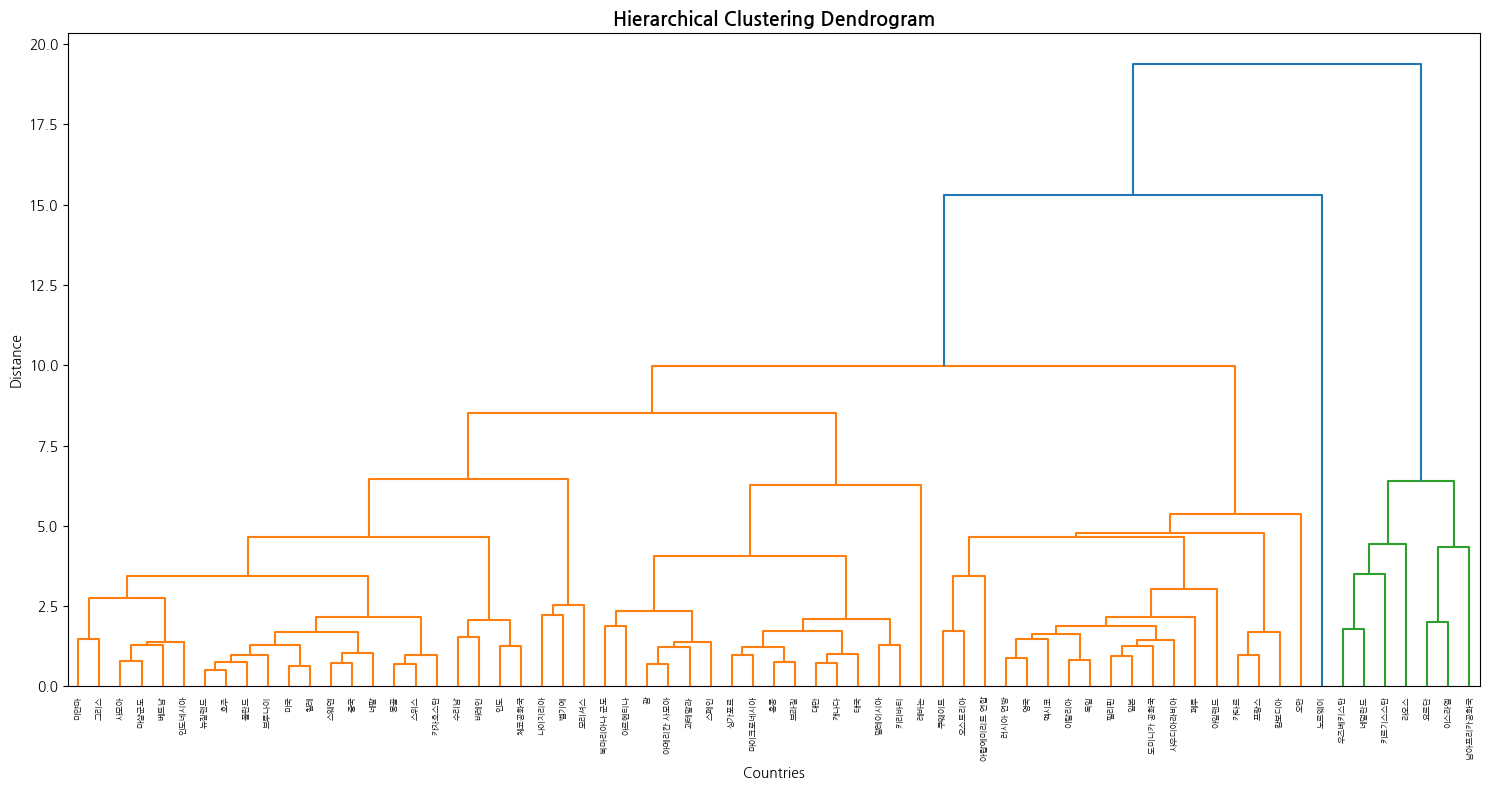


Hierarchical Clustering Results:
  statCdCntnKor1  hierarchical_cluster
0      아랍에미리트 연합                     1
1          아르헨티나                     1
2       아메리칸 사모아                     1
3          오스트리아                     1
4             호주                     1


In [23]:
## prompt:  X_scaled 데이터를 기반으로 계측적 군집화를 진행하기 위한 코드를 제공해주세요.

# Perform hierarchical clustering
linked = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(15, 8))
dendrogram(linked,
           orientation='top',
           labels=country_names,
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram', fontsize=14, fontweight='bold')
plt.xlabel('Countries')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

# Determine clusters from dendrogram (example: using a threshold)
# You can choose a threshold based on the dendrogram visualization
# For example, to get 4 clusters as in the previous KMeans
max_d = 10  # You might need to adjust this value based on the dendrogram
clusters_h = fcluster(linked, max_d, criterion='distance')

# Add hierarchical cluster labels to the dataframe
df['hierarchical_cluster'] = clusters_h - 1 # Adjusting to 0-based indexing

print("\nHierarchical Clustering Results:")
print(df[['statCdCntnKor1', 'hierarchical_cluster']].head())

- 계층적 군집화 결과 시각화


CLUSTER CHARACTERISTICS (Hierarchical Clustering)

HIERARCHICAL CLUSTER 0 (7 countries)
Countries: 이스라엘, 요르단, 키르기스스탄, 라오스, 네덜란드, 우즈베키스탄, 남아프리카공화국

Statistics (in tons):
  Average 2024 export: 9
  Total 2024 export: 62
  Average growth (2015-2024): 1621.2%

HIERARCHICAL CLUSTER 1 (59 countries)
Countries: 아랍에미리트 연합, 아르헨티나, 아메리칸 사모아, 오스트리아, 호주, 벨기에, 바레인, 브루나이, 브라질, 캐나다
          ... and 49 more

Statistics (in tons):
  Average 2024 export: 2
  Total 2024 export: 137
  Average growth (2015-2024): 313.5%

HIERARCHICAL CLUSTER 2 (1 countries)
Countries: 노르웨이

Statistics (in tons):
  Average 2024 export: 1
  Total 2024 export: 1
  Average growth (2015-2024): -79.2%
Y-axis range fixed to: [-0.6, 12.1] (Export Weight Ratio)


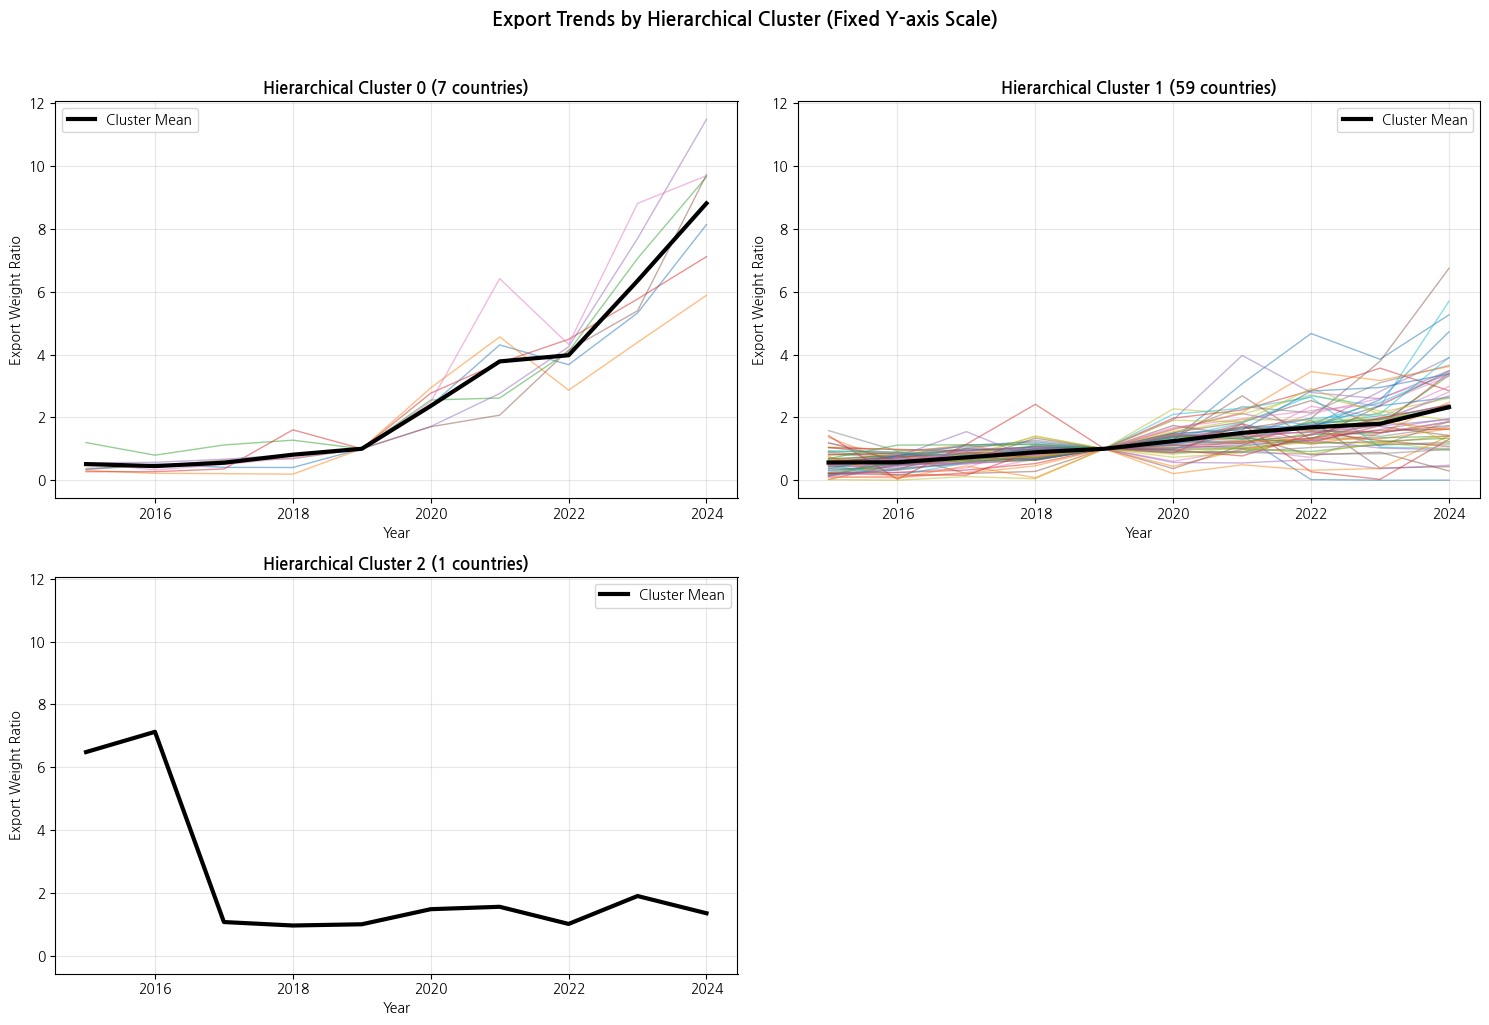

In [24]:
# ============================================================
# 4. CLUSTER ANALYSIS
# ============================================================

print("\n" + "="*80)
print("CLUSTER CHARACTERISTICS (Hierarchical Clustering)")
print("="*80)

# Get unique hierarchical cluster IDs
hierarchical_cluster_ids = sorted(df['hierarchical_cluster'].unique())
num_hierarchical_clusters = len(hierarchical_cluster_ids)


#for cluster_id in range(optimal_k):
for cluster_id in hierarchical_cluster_ids:

    #cluster_mask = df['cluster'] == cluster_id
    cluster_mask = df['hierarchical_cluster'] == cluster_id
    cluster_countries = df[cluster_mask]['statCdCntnKor1'].values
    cluster_data = X[cluster_mask]

    print(f"\n{'='*60}")
    print(f"HIERARCHICAL CLUSTER {cluster_id} ({len(cluster_countries)} countries)")
    print(f"{'='*60}")
    print(f"Countries: {', '.join(cluster_countries[:10])}")
    if len(cluster_countries) > 10:
        print(f"          ... and {len(cluster_countries)-10} more")

    print(f"\nStatistics (in tons):")
    # Ensure that cluster_data is not empty before calculating statistics
    if cluster_data.shape[0] > 0:
        print(f"  Average 2024 export: {cluster_data[:, -1].mean():,.0f}")
        print(f"  Total 2024 export: {cluster_data[:, -1].sum():,.0f}")
        # Handle potential division by zero if 2015 data is all zero
        avg_2015 = cluster_data[:, 0].mean()
        if avg_2015 > 1e-10: # Use a small threshold instead of exact zero
            print(f"  Average growth (2015-2024): {((cluster_data[:, -1].mean() / avg_2015) - 1) * 100:.1f}%")
        else:
            print(f"  Average growth (2015-2024): N/A (Average 2015 export was zero or near zero)")
    else:
        print("  No data in this cluster to calculate statistics.")


# ============================================================
# 6. TIME SERIES VISUALIZATION BY CLUSTER
# ============================================================

# Plot time series for each cluster
#fig, axes = plt.subplots(2, (optimal_k + 1) // 2, figsize=(15, 10))
fig, axes = plt.subplots(2, (num_hierarchical_clusters + 1) // 2, figsize=(15, 10))

axes = axes.flatten()

years = list(range(2015, 2025))

# Calculate global min and max for Y-axis to ensure all plots have same scale
all_data_in_thousands = X # Use original X data before scaling for meaningful export values
global_min = all_data_in_thousands.min()
global_max = all_data_in_thousands.max()

# Add some padding (5% on each side) for better visualization
y_padding = (global_max - global_min) * 0.05
y_min = global_min - y_padding
y_max = global_max + y_padding

print(f"Y-axis range fixed to: [{y_min:.1f}, {y_max:.1f}] (Export Weight Ratio)")

#for cluster_id in range(optimal_k):
for i, cluster_id in enumerate(hierarchical_cluster_ids):
    ax = axes[i]
    #cluster_mask = df['cluster'] == cluster_id
    cluster_mask = df['hierarchical_cluster'] == cluster_id
    cluster_data = X[cluster_mask] # Use original X data

    # Plot each country in the cluster
    for i, country_data in enumerate(cluster_data):
        ax.plot(years, country_data, alpha=0.5, linewidth=1)

    # Plot cluster mean
    # Ensure cluster_data is not empty before calculating the mean
    if cluster_data.shape[0] > 0:
        cluster_mean = cluster_data.mean(axis=0)
        ax.plot(years, cluster_mean, 'k-', linewidth=3, label='Cluster Mean')
    else:
        ax.plot(years, [0]*len(years), 'k-', linewidth=3, label='Cluster Mean') # Plot a zero line if cluster is empty


    ax.set_title(f'Hierarchical Cluster {cluster_id} ({sum(cluster_mask)} countries)', fontweight='bold')
    ax.set_xlabel('Year')
    ax.set_ylabel('Export Weight Ratio') # Corrected Y-axis label
    ax.grid(True, alpha=0.3)
    ax.legend()

    # Set the same Y-axis limits for all subplots
    ax.set_ylim(y_min, y_max)

# Remove extra subplots if odd number of clusters
#for i in range(optimal_k, len(axes)):
for i in range(num_hierarchical_clusters, len(axes)):

    fig.delaxes(axes[i])

plt.suptitle('Export Trends by Hierarchical Cluster (Fixed Y-axis Scale)', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()